In [57]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [58]:
# Data Reading

df = pd.read_excel("../data/Registro Público de Emissões.xlsx")

# Data Processing

df = df[df["Escopo"] == "Total"]
df.drop(columns=["Setor da Indústria", "Escopo"], inplace=True)

df = df.transpose()
df.columns = df.iloc[0]
df = df[1:].reset_index()
df = df.rename(columns={"index": "Years"})

list_of_companies = df.columns
list_of_companies = list(list_of_companies)
list_of_companies.remove("Years")

for col in list_of_companies:
    df[col] = df[col].astype(float)
    df[col] = df[col].astype(float)

df_filtered = df[df.Years >= 2017]

display(df.head())
display(df.info())


Empresa,Years,Suzano,CSN,Intercement,Ternium Brasil,Votorantim,ArcelorMittal,CBA,ISA Energia
0,2008,1071559.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,734909.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,1050928.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,1369237.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,1355714.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Years           16 non-null     int64  
 1   Suzano          16 non-null     float64
 2   CSN             11 non-null     float64
 3   Intercement     11 non-null     float64
 4   Ternium Brasil  11 non-null     float64
 5   Votorantim      9 non-null      float64
 6   ArcelorMittal   7 non-null      float64
 7   CBA             7 non-null      float64
 8   ISA Energia     7 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 1.3 KB


None

In [ ]:
# Auxiliaries Function


def applies_linear_regression(X, y, X_pred):
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_pred.reshape(-1, 1))
    y_pred[y_pred < 0] = 0
    return y_pred


def applies_autoregressive_model(data, p=0, d=0, q=0, steps_for_forec=1):
    model = ARIMA(data, order=(p, d, q)).fit()
    y_pred = model.forecast(steps=steps_for_forec)
    y_pred[y_pred < 0] = 0
    return y_pred


def generate_plot(company_name, X, y, X_pred, y_pred):
    (line,) = plt.plot(X, y, label=company_name)
    plt.plot(X_pred, y_pred, "o", color=line.get_color())


Suzano
X_train: [2017 2018 2019 2020 2021 2022 2023]
y_train: [1336754.86 1269096.85 3510477.86 3777425.13 4280282.87 4048948.87
 4085794.51]
X_pred: [2024 2025 2026 2027 2028 2029 2030]
y_pred: [5269344.13571429 5789937.9928571  6310531.85000002 6831125.70714283
 7351719.56428564 7872313.42142856 8392907.27857137]
X_plot: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023]
y_plot: [1071559.17  734909.56 1050928.8  1369237.85 1355714.11 1287628.03
 1766173.27 2195385.65 1408928.09 1336754.86 1269096.85 3510477.86
 3777425.13 4280282.87 4048948.87 4085794.51]

CSN
X_train: [2017 2018 2019 2020 2021 2022 2023]
y_train: [15521114.32 15044354.64 11179903.99 51838553.42 56986963.83 62768571.05
 68983109.92]
X_pred: [2024 2025 2026 2027 2028 2029 2030]
y_pred: [8.34234358e+07 9.41963458e+07 1.04969256e+08 1.15742166e+08
 1.26515076e+08 1.37287986e+08 1.48060896e+08]
X_plot: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
y_plot: [  201073.4    398435.

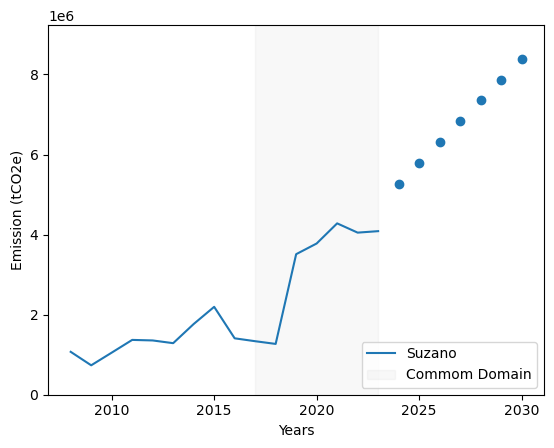

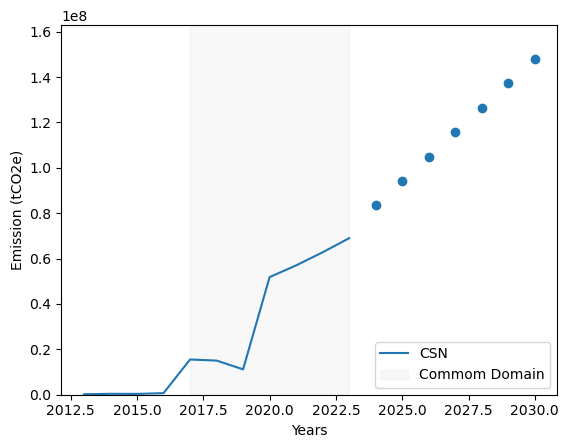

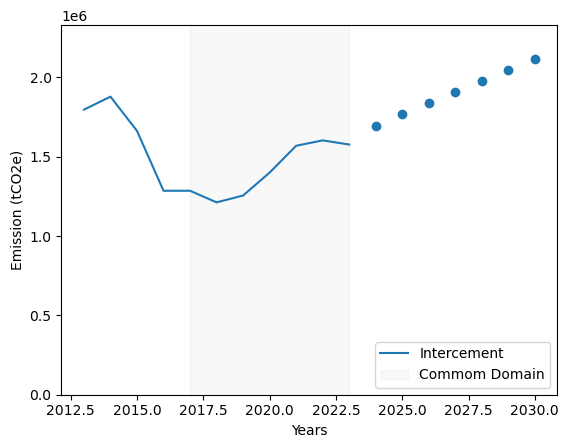

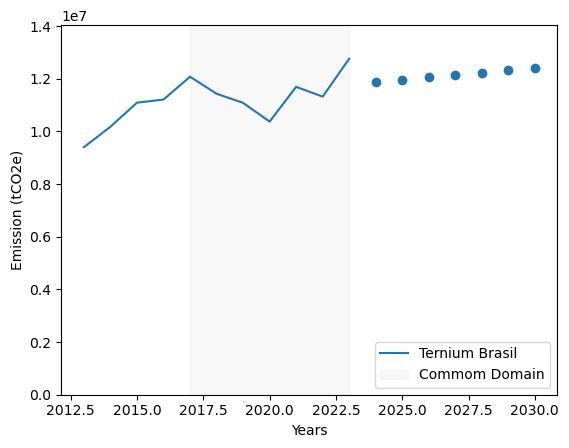

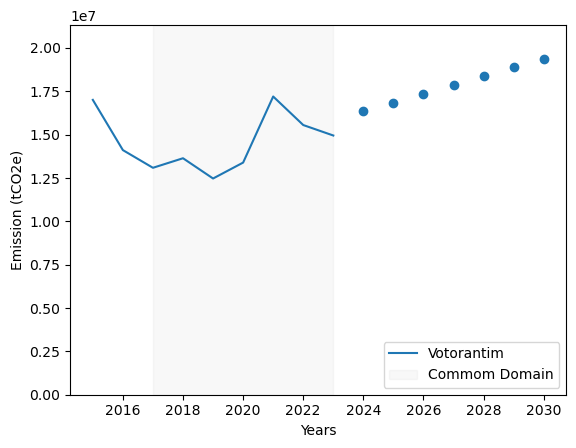

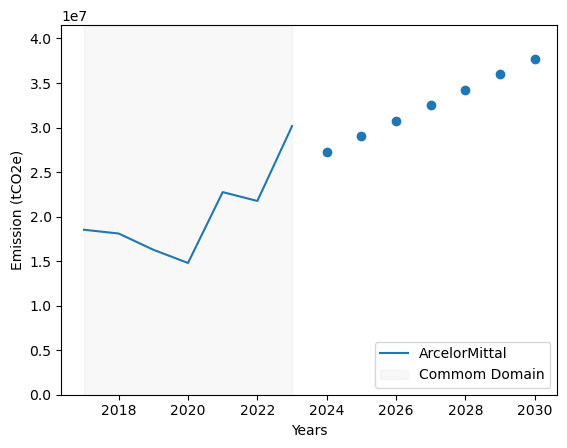

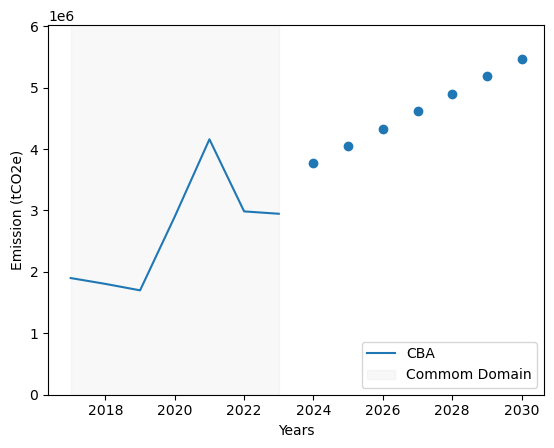

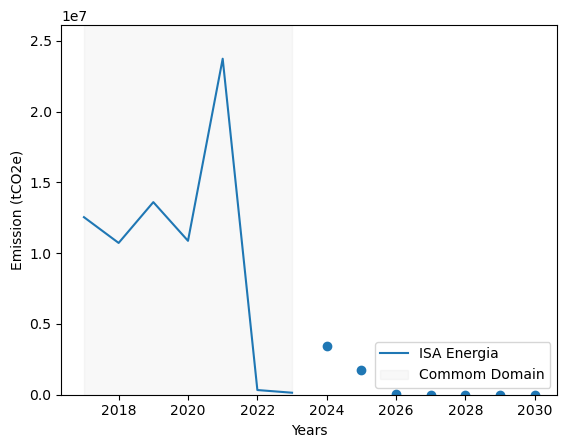

In [ ]:
# Main

X_pred = np.array(range(2024, 2031))

# ARIMA Model
if False:
    for company_name in list_of_companies:
        p, d, q = 3, 0, 0

        X_train = df_filtered.Years.values
        y_train = df_filtered.loc[:, company_name].values

        y_pred = applies_autoregressive_model(
            y_train, p=p, d=d, q=q, steps_for_forec=len(X_pred)
        )

        X_plot = df.Years.values
        y_plot = df.loc[:, company_name].values

        X_plot = X_plot[~np.isnan(y_plot)]
        y_plot = y_plot[~np.isnan(y_plot)]

        plt.figure()
        generate_plot(company_name, X_plot, y_plot, X_pred, y_pred)
        plt.ylim([0, 1.1 * max(max(y_plot), max(y_pred))])
        plt.axvspan(
            min(X_train), max(X_train), color="gray", alpha=0.05, label="Commom Domain"
        )
        plt.legend(loc="lower right")
        plt.xlabel("Years")
        plt.ylabel("Emission (tCO2e)")
        # plt.savefig(f"../img/ARIMA(p={p}, d={d}, q={q}) - {company_name}", transparent=True, dpi=300)

# Linear Model
if True:
    for company_name in list_of_companies:
        X_train = df_filtered.Years.values
        y_train = df_filtered.loc[:, company_name].values

        y_pred = applies_linear_regression(X_train, y_train, X_pred)

        X_plot = df.Years.values
        y_plot = df.loc[:, company_name].values

        X_plot = X_plot[~np.isnan(y_plot)]
        y_plot = y_plot[~np.isnan(y_plot)]

        plt.figure()
        generate_plot(company_name, X_plot, y_plot, X_pred, y_pred)
        plt.ylim([0, 1.1 * max(max(y_plot), max(y_pred))])
        plt.axvspan(
            min(X_train), max(X_train), color="gray", alpha=0.05, label="Commom Domain"
        )
        plt.legend(loc="lower right")
        plt.xlabel("Years")
        plt.ylabel("Emission (tCO2e)")
        plt.savefig(f"../img/Linear Model - {company_name}", transparent=True, dpi=300)